In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [71]:
data = pd.read_csv('Engg_College_Data.csv', index_col = 0)
data.head()
X=data.iloc[:,[1,2,3,4,5]].values
X

array([[5, 2, 5, 5, 3],
       [4, 2, 5, 5, 3],
       [4, 5, 5, 4, 5],
       [5, 4, 5, 4, 4],
       [2, 5, 2, 2, 5],
       [3, 4, 3, 3, 4],
       [1, 3, 1, 1, 2],
       [4, 4, 5, 5, 5],
       [4, 4, 4, 4, 4],
       [3, 4, 3, 4, 5],
       [3, 4, 3, 4, 5],
       [2, 5, 3, 2, 3],
       [1, 5, 1, 2, 2],
       [3, 5, 3, 3, 4],
       [3, 2, 2, 2, 3],
       [3, 3, 2, 2, 3],
       [3, 3, 1, 2, 3],
       [3, 4, 4, 3, 3],
       [3, 5, 4, 3, 3],
       [3, 5, 3, 2, 3],
       [2, 2, 2, 2, 1],
       [2, 2, 1, 2, 1],
       [2, 5, 1, 1, 1],
       [1, 1, 1, 2, 5],
       [1, 1, 1, 1, 5],
       [3, 4, 5, 2, 3]], dtype=int64)

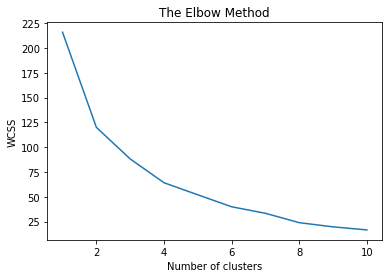

In [72]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [73]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
kmeans.labels_

array([2, 2, 2, 2, 0, 0, 1, 2, 2, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 3, 3, 0])

In [74]:
data['clusters']=y_kmeans
data


,Engg_College,Teaching,Fees,Placements,Internship,Infrastructure,clusters
SR_NO,,,,,,,
1,A,5,2,5,5,3,2
2,B,4,2,5,5,3,2
3,C,4,5,5,4,5,2
4,D,5,4,5,4,4,2
5,E,2,5,2,2,5,0
6,F,3,4,3,3,4,0
7,G,1,3,1,1,2,1
8,H,4,4,5,5,5,2
9,I,4,4,4,4,4,2


In [75]:
s={}
for i in data['clusters']:
    if i not in s:
        s[i]=1
    else:
        s[i]+=1
print(s)
        

{2: 6, 0: 10, 1: 8, 3: 2}


In [76]:
data1=data[data['clusters']==0]
data1

,Engg_College,Teaching,Fees,Placements,Internship,Infrastructure,clusters
SR_NO,,,,,,,
5,E,2,5,2,2,5,0
6,F,3,4,3,3,4,0
10,J,3,4,3,4,5,0
11,K,3,4,3,4,5,0
12,L,2,5,3,2,3,0
14,N,3,5,3,3,4,0
18,R,3,4,4,3,3,0
19,S,3,5,4,3,3,0
20,T,3,5,3,2,3,0


In [77]:
print(data1['Teaching'].mean())
print(data1['Fees'].mean())
print(data1['Placements'].mean())
print(data1['Internship'].mean())
print(data1['Infrastructure'].mean())

2.8
4.5
3.3
2.8
3.8


In [78]:
data2=data[data['clusters']==1]
data2

,Engg_College,Teaching,Fees,Placements,Internship,Infrastructure,clusters
SR_NO,,,,,,,
7,G,1,3,1,1,2,1
13,M,1,5,1,2,2,1
15,O,3,2,2,2,3,1
16,P,3,3,2,2,3,1
17,Q,3,3,1,2,3,1
21,U,2,2,2,2,1,1
22,V,2,2,1,2,1,1
23,W,2,5,1,1,1,1


In [79]:
print(data2['Teaching'].mean())
print(data2['Fees'].mean())
print(data2['Placements'].mean())
print(data2['Internship'].mean())
print(data2['Infrastructure'].mean())

2.125
3.125
1.375
1.75
2.0


In [80]:
data3=data[data['clusters']==2]
data3

,Engg_College,Teaching,Fees,Placements,Internship,Infrastructure,clusters
SR_NO,,,,,,,
1,A,5,2,5,5,3,2
2,B,4,2,5,5,3,2
3,C,4,5,5,4,5,2
4,D,5,4,5,4,4,2
8,H,4,4,5,5,5,2
9,I,4,4,4,4,4,2


In [81]:
print(data3['Teaching'].mean())
print(data3['Fees'].mean())
print(data3['Placements'].mean())
print(data3['Internship'].mean())
print(data3['Infrastructure'].mean())

4.333333333333333
3.5
4.833333333333333
4.5
4.0


In [82]:
data4=data[data['clusters']==3]
data4

,Engg_College,Teaching,Fees,Placements,Internship,Infrastructure,clusters
SR_NO,,,,,,,
24,X,1,1,1,2,5,3
25,Y,1,1,1,1,5,3


In [83]:
print(data4['Teaching'].mean())
print(data4['Fees'].mean())
print(data4['Placements'].mean())
print(data4['Internship'].mean())
print(data4['Infrastructure'].mean())

1.0
1.0
1.0
1.5
5.0


In [84]:
mean_df=pd.DataFrame([[data3['Teaching'].mean(),data3['Fees'].mean(),data3['Placements'].mean(),data3['Internship'].mean(),
                       data3['Infrastructure'].mean()],[data1['Teaching'].mean(),
data1['Fees'].mean(),data1['Placements'].mean(),data1['Internship'].mean(),data1['Infrastructure'].mean()],
                     [data2['Teaching'].mean(),data2['Fees'].mean(),data2['Placements'].mean(),
                      data2['Internship'].mean(),data2['Infrastructure'].mean()],
                     [data4['Teaching'].mean(),data4['Fees'].mean(),data4['Placements'].mean(),
                      data4['Internship'].mean(),data4['Infrastructure'].mean()]],columns=['Teaching','Fees','Placements','Internship','Infrastructure'],
                    index=['cluster2','cluster0','cluster1','cluster3'])

In [85]:
mean_df

,Teaching,Fees,Placements,Internship,Infrastructure
cluster2,4.333333,3.500,4.833333,4.50,4.0
cluster0,2.800000,4.500,3.300000,2.80,3.8
cluster1,2.125000,3.125,1.375000,1.75,2.0
cluster3,1.000000,1.000,1.000000,1.50,5.0


# thus from the above dataframe we conclude that cluster2 include excellent college ,cluster 0 is include good colleges,cluster 1 include average and cluster 3 include poor college

# final

In [86]:
dictionary={0:'good college',1:'average college',2:'excellent college',3:'poor college'}
data['clusters'] = data['clusters'].map(dictionary)

In [87]:
data

,Engg_College,Teaching,Fees,Placements,Internship,Infrastructure,clusters
SR_NO,,,,,,,
1,A,5,2,5,5,3,excellent college
2,B,4,2,5,5,3,excellent college
3,C,4,5,5,4,5,excellent college
4,D,5,4,5,4,4,excellent college
5,E,2,5,2,2,5,good college
6,F,3,4,3,3,4,good college
7,G,1,3,1,1,2,average college
8,H,4,4,5,5,5,excellent college
9,I,4,4,4,4,4,excellent college
